In [6]:
from nltk.corpus import stopwords
 
sw = stopwords.words('russian')

In [7]:
from pymystem3 import Mystem
import re

def norm(text):
    m = Mystem()
    text = text.lower()
    text = re.sub('([^а-яА-ЯёЁ\s\n/]+)', '', text)
    text = re.sub('([ \t]+)', ' ', text)
    text = m.analyze(text)
    text2 = []
    for word in text:
        if ("\n" in word['text']):
            text2.append("\n")
        if (' ' not in word['text']) and ("\n" not in word['text']) and ('/' not in word['text']):
            if word['analysis']:
                lex = word['analysis'][0]['lex']
                gr = word['analysis'][0]['gr'][0]
                if lex not in sw:
                    text2.append(lex + '_' + gr)       
            
    return(' '.join(text2))
    

In [8]:
import os

def extract_text():
    TEXT = ''
    f_files = []
    for root, dirs, files in os.walk('texts'):
        f_files += [os.path.join(root, name) for name in files]
    for file in f_files:
        fin = open(file, 'r', encoding='utf-8')
        text = fin.read()
        text = norm(text)
        TEXT += '\n ' + text
        fin.close()
    return(TEXT)
        
TEXT = extract_text()


In [9]:
TEXT2 = TEXT
file = open('text.txt', 'w', encoding='utf-8')
file.write(TEXT2)
file.close()

In [ ]:
###

In [10]:
import gensim

file = 'text.txt'
data = gensim.models.word2vec.LineSentence(file)

model = gensim.models.Word2Vec(data, size=300, window=5)

model.init_sims(replace=True)
model_path = "model.bin"
model.wv.save_word2vec_format(model_path, binary=True)


In [15]:
def bfs(q, used):
    i = 0
    pos = q[0][-1]
    while (used[q[i]] < 3):
        v = q[i]
        friends = model.wv.most_similar(v, topn=6)
        #print(friends)
        for friend in friends:
            if (friend[1] >= 0.5) and (friend[0][-1] == pos):
                if not (friend[0] in G.nodes()):
                    G.add_node(friend[0])
                    G.add_edge(v, friend[0])
                    q.append(friend[0])
                    used[friend[0]] = used[v] + 1
                elif (used[friend[0]] == used[v]):
                    G.add_edge(v, friend[0])
                else:
                    break
        i += 1
    print('узлы', G.nodes())
    print('рёбра', G.edges())
        

In [16]:
import networkx as nx

q = []
G = nx.Graph()
items = ['любовь_S']
used = dict()
for item in items:
    G.add_node(item)
    q.append(item)
    used[item] = 0
bfs(q, used)

узлы ['любовь_S', 'счастие_S', 'душа_S', 'воля_S', 'отношение_S', 'чувство_S', 'ум_S', 'сила_S', 'судьба_S', 'закон_S', 'право_S', 'желание_S', 'власть_S', 'дружба_S', 'характер_S', 'честь_S', 'долг_S', 'наука_S', 'истина_S']
рёбра [('любовь_S', 'счастие_S'), ('любовь_S', 'душа_S'), ('любовь_S', 'воля_S'), ('любовь_S', 'отношение_S'), ('любовь_S', 'чувство_S'), ('счастие_S', 'душа_S'), ('счастие_S', 'воля_S'), ('душа_S', 'чувство_S'), ('душа_S', 'ум_S'), ('душа_S', 'сила_S'), ('воля_S', 'судьба_S'), ('воля_S', 'закон_S'), ('воля_S', 'право_S'), ('воля_S', 'желание_S'), ('воля_S', 'власть_S'), ('судьба_S', 'желание_S'), ('судьба_S', 'дружба_S'), ('судьба_S', 'характер_S'), ('закон_S', 'власть_S'), ('закон_S', 'право_S'), ('закон_S', 'честь_S'), ('закон_S', 'долг_S'), ('закон_S', 'наука_S'), ('желание_S', 'истина_S')]


In [34]:
def maxi(di):
    res = 0
    ans = -1
    for i in di:
        if di[i] > res:
            res = di[i]
            ans = i
    return (ans, res)

In [35]:
print('Самые центральные узлы графа:')
print('degree centrality', maxi(nx.degree_centrality(G)))
print('betweenness centrality', maxi(nx.betweenness_centrality(G)))
print('closeness centrality', maxi( nx.closeness_centrality(G)))
print('eigenvector_centrality', maxi(nx.eigenvector_centrality(G)))

Самые центральные узлы графа:
degree centrality ('воля_S', 0.38888888888888884)
betweenness centrality ('воля_S', 0.7026143790849674)
closeness centrality ('воля_S', 0.5806451612903226)
eigenvector_centrality ('воля_S', 0.5241307769178629)


In [37]:
print('плотность графа:', nx.density(G))
print('диаметр:', nx.diameter(G))
print('радиус:', nx.radius(G))
print('коэффициент кластеризации:', nx.average_clustering(G))
print('коэффициент ассортативности:', nx.degree_pearson_correlation_coefficient(G))

плотность графа: 0.14035087719298245
диаметр: 5
радиус: 3
коэффициент кластеризации: 0.26265664160401003
коэффициент ассортативности: -0.44288577154308617


In [44]:
from networkx.algorithms import community

com = community.greedy_modularity_communities(G)
#print(com)
for i in com:
    print(' '.join(list(i)))

чувство_S ум_S сила_S счастие_S душа_S отношение_S любовь_S
право_S долг_S воля_S власть_S наука_S честь_S закон_S
желание_S дружба_S судьба_S истина_S характер_S


In [ ]:
#интерпретация: 
#2ая группа(право, долг, воля ...) — социальные понятия. Касающиеся, прежде всего, регулирования отношений в обществе. 
#1ая и 3я группы сходны, но в первой более абстрактные понятия, а в третьей — относящиеся, скорее, к одному человеку

/home/annie/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


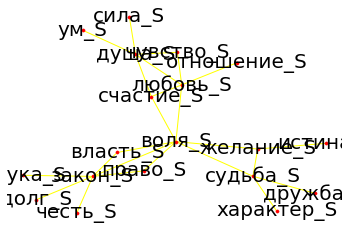

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')
plt.axis('off') 
plt.show()